In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
credit_loss = pd.Series(np.random.beta(1.47, 863.24, size=10000))
#credit_loss = np.random.beta(1.47, 863.24, size=10000)

In [6]:
credit_loss

0       0.000511
1       0.000737
2       0.003964
3       0.001535
4       0.002172
          ...   
9995    0.002362
9996    0.001221
9997    0.001182
9998    0.000829
9999    0.004988
Length: 10000, dtype: float64

<AxesSubplot:ylabel='Count'>

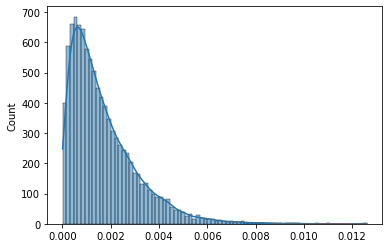

In [7]:
sns.histplot(credit_loss, kde=True)

In [8]:
market_loss = pd.Series(np.random.normal(-0.01, 0.49, 10000))

In [9]:
market_loss

0      -0.898456
1       0.379396
2      -0.615139
3      -0.133951
4       0.090674
          ...   
9995   -0.372462
9996    0.211698
9997    0.051337
9998   -1.094413
9999   -0.157386
Length: 10000, dtype: float64

<AxesSubplot:ylabel='Count'>

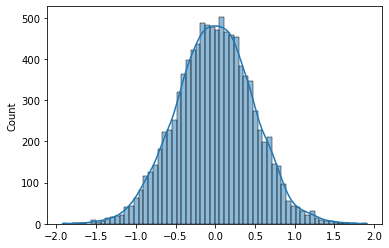

In [10]:
sns.histplot(market_loss, kde=True)

In [11]:
op_loss = pd.Series(np.random.lognormal(-6.51, 0.07, 10000))

<AxesSubplot:ylabel='Count'>

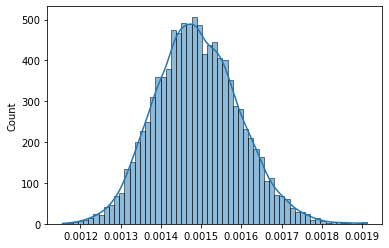

In [12]:
sns.histplot(op_loss, kde=True)

In [23]:
data = pd.concat([credit_loss,market_loss, op_loss], axis=1)
data.rename(columns={0: "Credit Risk", 1: "Market Risk", 2:"Operational Risk"})
#df.rename(columns={"A": "a", "B": "c"})

,Credit Risk,Market Risk,Operational Risk
0,0.000511,-0.898456,0.001460
1,0.000737,0.379396,0.001463
2,0.003964,-0.615139,0.001382
3,0.001535,-0.133951,0.001483
4,0.002172,0.090674,0.001391
...,...,...,...
9995,0.002362,-0.372462,0.001529
9996,0.001221,0.211698,0.001578
9997,0.001182,0.051337,0.001395
9998,0.000829,-1.094413,0.001337


<Axes3DSubplot:>

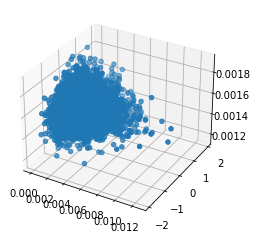

In [24]:
from copulas.visualization import scatter_3d
scatter_3d(data)

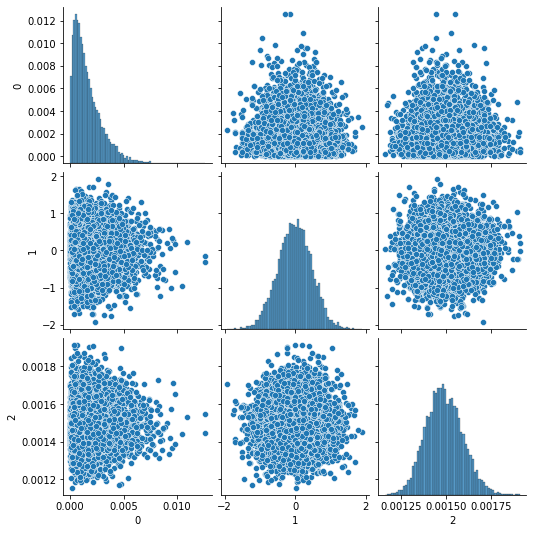

In [25]:
sns.pairplot(test)

<AxesSubplot:>

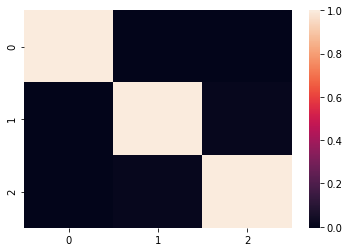

In [26]:
sns.heatmap(test.corr())

In [27]:
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(data)

C:\Users\doubl\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\doubl\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\doubl\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\doubl\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\doubl\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [28]:
sampled = dist.sample(1000)
sampled.head()

,0,1,2
0,0.002925,0.643923,0.001359
1,0.002306,-0.658411,0.001466
2,0.002305,-0.839711,0.001509
3,0.001016,-0.441990,0.001414
4,0.004399,0.615170,0.001483


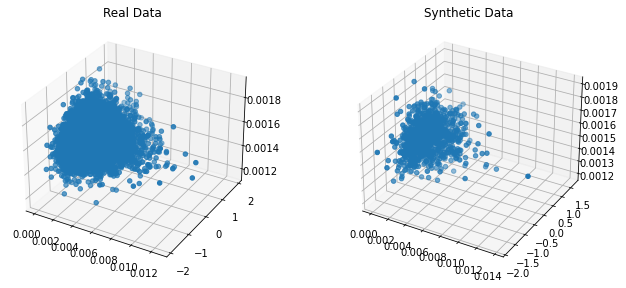

In [29]:
from copulas.visualization import compare_3d

compare_3d(data, sampled)